In [ ]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 45.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from glob import glob
import fastparquet
from scipy import stats

from tqdm import tqdm

In [ ]:
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
paths = ['/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00000.parquet',
         '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00001.parquet',
         '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00002.parquet',
         '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00003.parquet',
         '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00004.parquet',
         '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00005.parquet',
        #  '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00006.parquet',
        #  '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00007.parquet',
        #  '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00008.parquet',
        #  '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00009.parquet',
        #  '/content/drive/MyDrive/!data_skoltech/!data_skoltech/online/games_moves/chess_sample_1/chess_sample_1/part-00010.parquet'
         ]

In [ ]:
chess_sample_df = pd.concat((pd.read_parquet(file) for file in paths))

In [ ]:
chess_sample_df

,Date,Round,White,Black,Result,Tournament,CurrentPosition,ECO,ECOUrl,WhiteElo,...,StartTime,EndDate,EndTime,Link,Moves,Moves_length,Tournament_long,Moves_clean,sf_n1_d22,sf_n10_d18
0,2020.07.18,-,Hikaru,imastraw,1-0,,2r3k1/N2q3p/b4pp1/3p4/3Bn3/1P2P3/PQ3PPP/2R3K1 ...,A04,Reti-Opening-Nimzo-Larsen-Variation-2...b6-3.B...,3263,...,20:15:48,2020.07.18,20:19:12,5169704302,1. Nf3 {[%clk 0:02:59.9]} 1... Nf6 {[%clk 0:02...,47,,"[Nf3, Nf6, b3, b6, Bb2, Bb7, d4, g6, e3, Bg7, ...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'e7e6',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
1,2021.01.25,-,Bigfish1995,Azerichess,0-1,,6k1/5p1p/1B1p4/r5p1/P4r2/3K4/2P4P/R7 b - -,B33,Sicilian-Defense-Open-3...cxd4-4.Nxd4-Nf6-5.Nc3,3016,...,20:53:33,2021.01.25,21:00:11,6345643292,1. e4 {[%clk 0:03:01]} 1... c5 {[%clk 0:03:01]...,63,,"[e4, c5, Nf3, Nc6, d4, cxd4, Nxd4, Nf6, Nc3, e...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'e7e6',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
2,2022.08.16,-,Grischuk,krzyzan94,1/2-1/2,titled-tuesday,8/5b2/5P2/8/8/1k6/p7/K7 w - -,E60,Kings-Indian-Defense,3041,...,21:30:45,2022.08.16,21:39:24,54424259185,1. d4 {[%clk 0:03:00.9]} 1... Nf6 {[%clk 0:02:...,156,late-titled-tuesday-blitz-august-16-2022-3304769,"[d4, Nf6, c4, g6, Bg5, Bg7, Nc3, h6, Bd2, d6, ...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'd7d5',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
3,2020.03.02,-,Hikaru,Robert_Chessmood,1/2-1/2,,8/8/8/5p2/5B2/5K1k/8/8 b - -,D10,Slav-Defense...5.Bf4-Nc6-6.e3-Bf5,3239,...,15:50:01,2020.03.02,15:56:08,4553851201,1. d4 {[%clk 0:02:59.9]} 1... d5 {[%clk 0:02:5...,159,,"[d4, d5, c4, c6, Nc3, Nf6, cxd5, cxd5, Bf4, Nc...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'd7d5',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
4,2019.02.07,-,wonderfultime,Hikaru,1/2-1/2,,8/6K1/4k1n1/6P1/5n2/8/8/8 w - -,A46,Indian-Game-Polish-Variation,2884,...,15:10:36,2019.02.07,15:17:12,3439963952,1. d4 {[%clk 0:02:59.9]} 1... Nf6 {[%clk 0:02:...,182,,"[d4, Nf6, Nf3, b5, Bf4, Bb7, Nbd2, e6, e3, a6,...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'd7d5',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,2023.11.13,-,Hikaru,artin10862,1-0,,r4k2/pp3p2/5n1P/2p5/3pP2P/3P3B/PP1N1P2/n1K4R b...,B11,Caro-Kann-Defense-Two-Knights-Mindeno-Exchange...,3301,...,18:34:29,2023.11.13,18:36:05,93639550807,1. e4 {[%clk 0:03:00]} 1... c6 {[%clk 0:03:00]...,43,,"[e4, c6, Nc3, d5, Nf3, Bg4, h3, Bxf3, Qxf3, e6...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'e7e6',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
5570,2022.09.30,-,GMWSO,gurelediz,0-1,,2r3k1/p3ppbp/5np1/3P4/8/1PqQ1PP1/P3P2P/R1B2K2 ...,A30,Reti-Opening-Kings-Indian-Attack-Symmetrical-D...,2991,...,19:55:14,2022.09.30,19:56:22,58306798537,1. Nf3 {[%clk 0:03:00]} 1... Nf6 {[%clk 0:03:0...,32,,"[Nf3, Nf6, g3, g6, Bg2, Bg7, O-O, O-O, c4, c5,...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'e7e6',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
5571,2019.07.02,-,Hikaru,fmshawnrl123,1-0,,r1bk1b1r/pp1n2p1/7p/3pP3/8/6Q1/PPP2PPP/R1B1K2R...,B10,Caro-Kann-Defense-Two-Knights-Caro-Kane-Variation,3114,...,01:47:14,2019.07.02,01:48:05,3829620088,1. e4 {[%clk 0:02:59.6]} 1... c6 {[%clk 0:02:5...,29,,"[e4, c6, Nc3, d5, Nf3, dxe4, Nxe4, Nf6, Neg5, ...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'e7e6',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."
5572,2020.07.06,-,Hikaru,Hikaru-bot,0-1,,r3kb1r/pb3p2/1p5p/3pPpp1/1nqP4/2N2N2/PP3PPP/R1...,C00,French-Defense-Normal-Variation-2...b6,3224,...,20:19:56,2020.07.06,20:20:39,5110722806,1. e4 {[%clk 0:04:59.9]} 1... e6 {[%clk 0:04:5...,30,,"[e4, e6, d4, b6, Nd2, Bb7, Ngf3, d5, e5, c5, c...","[[{'_1': 'e2e4', '_2': 52.0}], [{'_1': 'e7e6',...","[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '..."


In [ ]:
players = pd.read_excel('/content/drive/MyDrive/!data_skoltech/!data_skoltech/players/!Итоговый_реестр.xlsx')
players.head(5)

,username,title,name,отобран для анализа,FIDE_ID,FIDE_name,Fed,B-day
0,123lt,GM,Tingjie Lei,1,8605114.0,"Lei, Tingjie",CHN,1997.0
1,124chess,GM,Дмитрий Хегай,1,24153729.0,"Khegay, Dmitriy",RUS,1997.0
2,1977ivan,GM,Ivan Ivanisevic,1,912417.0,"Ivanisevic, Ivan",SRB,1977.0
3,1stsecond,GM,Nikita Meshkovs,1,11602740.0,"Meshkovs, Nikita",LAT,1994.0
4,4thd-alpeacefulmoon,GM,Robert Markus,1,921637.0,"Markus, Robert",SRB,1983.0


Перевод нотации

In [ ]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=cff68947fb5fc85a2cd235f81c5bf73312310ba6c0dbd02043a1c3d99e3e204b
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess


In [ ]:
import chess

def change_notation(moves):

  board = chess.Board()
  stockfish_moves = []

  for move in moves:
    try:
        board.push_san(move)
        last_move_uci = board.peek().uci()
        stockfish_moves.append([{'_1': last_move_uci}])
    except:
      return None

  return stockfish_moves

In [ ]:
chess_sample_df['Moves_clean'] = chess_sample_df['Moves_clean'].apply(lambda x: change_notation(x))

Подсчет совпадений для черных и белых партии

In [ ]:
def coincidences_1(row):
  real = row['Moves_clean']
  pred = row['sf_n1_d22']

  coincidences_black = 0
  coincidences_white = 0

  for i in range(len(real)):
    motion = real[i]
    if motion[0]['_1'] == pred[i][0]['_1']:
      if i%2 == 0:
        coincidences_white += 1
      else:
        coincidences_black += 1
  return coincidences_white, coincidences_black

In [ ]:
chess_sample_df['coincidences_w'] = chess_sample_df.apply(lambda x : coincidences_1(x)[0], axis=1)
chess_sample_df['coincidences_b'] = chess_sample_df.apply(lambda x : coincidences_1(x)[1], axis=1)

In [ ]:
def winner_coincidences_frac(row):
  if row['Result'] == '1-0':
    return row['coincidences_w'] / (row['Moves_length'] // 2 + 1)
  elif row['Result'] == '0-1':
    return row['coincidences_b'] / (row['Moves_length'] // 2 + 1)
  else:
    return None

In [ ]:
chess_sample_df['coincidences_frac_w'] = round(chess_sample_df['coincidences_w'] / (chess_sample_df['Moves_length']/2 + 1), 2)
chess_sample_df['coincidences_frac_b'] = round(chess_sample_df['coincidences_b'] / (chess_sample_df['Moves_length']/2 + 1), 2)


In [ ]:
chess_sample_df['coincidences_frac_w'].describe()

,coincidences_frac_w
count,33494.000000
mean,0.492223
std,0.104835
min,0.000000
25%,0.420000
50%,0.490000
75%,0.560000
max,0.960000


Доля совпадений в ходях победителя партии

In [ ]:
chess_sample_df['coincidences_frac_winner'] = chess_sample_df.apply(winner_coincidences_frac, axis=1)
chess_sample_df['coincidences_frac_winner'].describe()

,coincidences_frac_winner
count,29432.000000
mean,0.532980
std,0.096621
min,0.000000
25%,0.468354
50%,0.529412
75%,0.595745
max,1.000000


Доля совпадений в зависимости от турнира для победителя партии там, где он есть

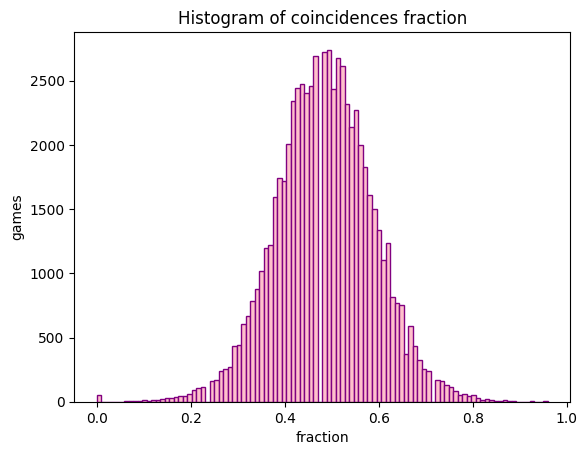

In [ ]:
import matplotlib.pyplot as plt

y = pd.concat([chess_sample_df['coincidences_frac_w'], chess_sample_df['coincidences_frac_b']])
plt.hist(y, color='pink', bins=100, edgecolor = 'purple')
plt.title('Histogram of coincidences fraction')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

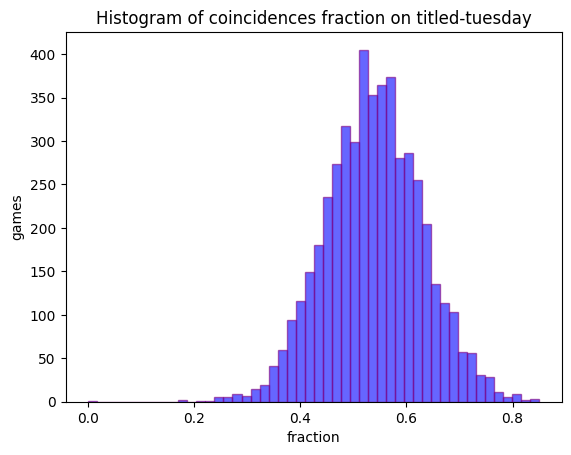

In [ ]:
y1 = chess_sample_df[chess_sample_df['Tournament'] == 'titled-tuesday']['coincidences_frac_winner']

plt.hist(y1, color='blue', bins=50, alpha = .6, edgecolor = 'purple', label='titled-tuesday')
plt.title('Histogram of coincidences fraction on titled-tuesday')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

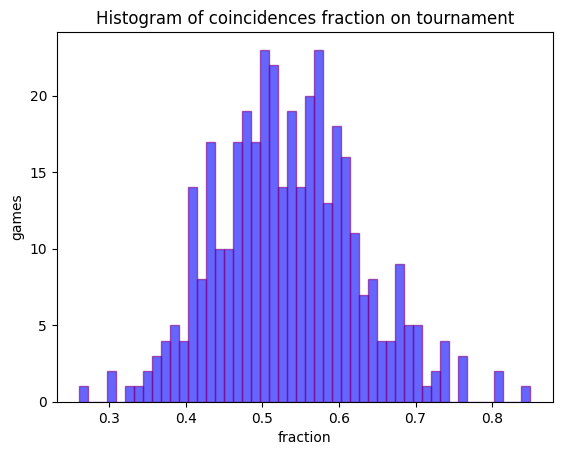

In [ ]:
y2 = chess_sample_df[chess_sample_df['Tournament'] == 'tournament']['coincidences_frac_winner']

plt.hist(y2, color='blue', bins=50, alpha = .6, edgecolor = 'purple', label='tounrnament')
plt.title('Histogram of coincidences fraction on tournament')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

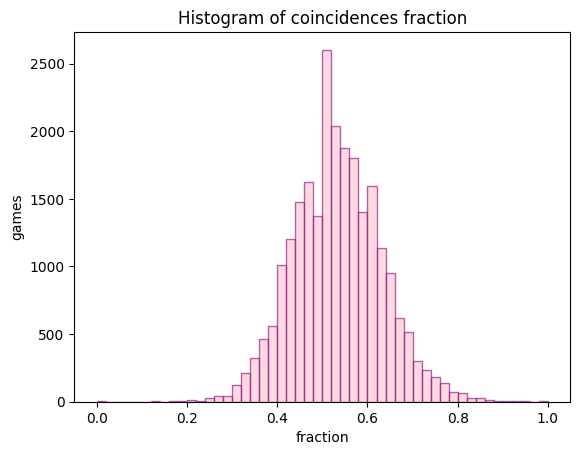

In [ ]:
y3 = chess_sample_df[chess_sample_df['Tournament'] == '']['coincidences_frac_winner']

plt.hist(y3, color='pink', bins=50, alpha = .6, edgecolor = 'purple')
plt.title('Histogram of coincidences fraction')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

In [ ]:
chess_sample_df['Tournament'].value_counts()


,count
Tournament,
,27357
titled-tuesday,5687
tournament,450


In [ ]:
chess_sample_df[chess_sample_df['coincidences_frac_winner'] > 0.8]['Tournament'].value_counts()

,count
Tournament,
,132
titled-tuesday,12
tournament,3


Время хода

In [ ]:
import re
def motion_times(row):
  time_pattern = r'\d+:\d+:\d+\.?\d?'
  times = re.findall(time_pattern, row['Moves'])
  return times


In [ ]:
chess_sample_df['Moves_time'] = chess_sample_df.apply(motion_times, axis=1)

In [ ]:
def coincidences_time_(row):
  real = row['Moves_clean']
  pred = row['sf_n1_d22']
  times = row['Moves_time']

  coincidences_time = []
  another_time = []

  for i in range(len(real)):
    motion = real[i]
    if motion[0]['_1'] == pred[i][0]['_1']:
      coincidences_time.append(times[i])
    else:
      another_time.append(times[i])

  return [coincidences_time, another_time]

In [ ]:
times = chess_sample_df.apply(coincidences_time_, axis=1)

In [ ]:
def average_time_in_seconds(times):
  seconds_array = []
  for time in times:
    hours, minutes, seconds = time.split(':')
    amount = float(hours)*3600 + float(minutes)*60 + float(seconds)
    seconds_array.append(amount)
  return np.mean(np.array(seconds_array))


In [ ]:
mean_times_coin = []
mean_times_another = []
for item in times:
  coincidences_times, another_times = np.array(item[0]), np.array(item[1])
  mean_times_coin.append(average_time_in_seconds(coincidences_times))
  mean_times_another.append(average_time_in_seconds(another_times))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


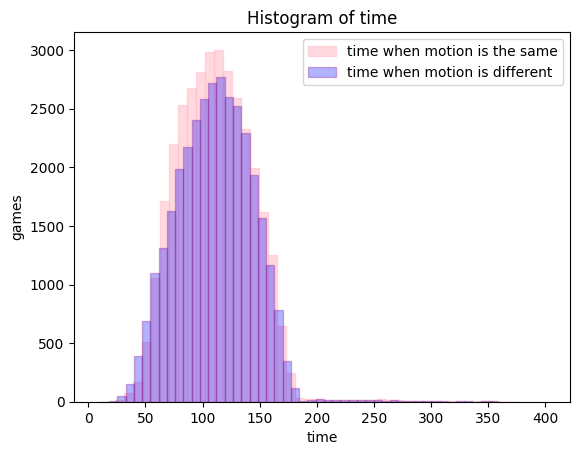

In [ ]:
y1 = mean_times_coin
y2 = mean_times_another
plt.hist(y1, color='pink', bins=50, alpha = 0.6, edgecolor = 'pink', label = 'time when motion is the same')
plt.hist(y2, color='blue', bins=50, alpha = 0.3, edgecolor = 'purple', label = 'time when motion is different')
plt.title('Histogram of time')
plt.xlabel('time')
plt.ylabel('games')
plt.legend()
plt.show()

Разделим время на части, чтобы проанализировать нужное время ходов.

Первые 10 ходов - средняя продолжительность шахматного дебюта
Остальные ходы мы раздалим на две части - основная и заключительная
Мы посмотрим на время ходов в основной части в зависимости от совпадений с результатом stockfish

In [ ]:
def movies_separation(row):
  amount = len(row['Moves_clean'])
  second_part_end = (amount - 10) // 2 + 10
  return min(10, amount), min(second_part_end, amount), amount

chess_sample_df['parts_idxs'] = chess_sample_df.apply(movies_separation, axis=1)

In [ ]:
chess_sample_df.head()

,Date,Round,White,Black,Result,Tournament,CurrentPosition,ECO,ECOUrl,WhiteElo,...,sf_n10_d18,coincidences_w,coincidences_b,coincidences_frac_w,coincidences_frac_b,coincidences_frac_winner,Moves_time,Main_moves,Main_part_idxs,parts_idxs
0,2020.07.18,-,Hikaru,imastraw,1-0,,2r3k1/N2q3p/b4pp1/3p4/3Bn3/1P2P3/PQ3PPP/2R3K1 ...,A04,Reti-Opening-Nimzo-Larsen-Variation-2...b6-3.B...,3263,...,"[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '...",11,8,0.45,0.33,0.458333,"[0:02:59.9, 0:02:59.9, 0:02:58.8, 0:02:59.8, 0...","[[{'_1': 'f1e2'}], [{'_1': 'e8g8'}], [{'_1': '...","(10, 18)","(10, 28, 47)"
1,2021.01.25,-,Bigfish1995,Azerichess,0-1,,6k1/5p1p/1B1p4/r5p1/P4r2/3K4/2P4P/R7 b - -,B33,Sicilian-Defense-Open-3...cxd4-4.Nxd4-Nf6-5.Nc3,3016,...,"[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '...",18,17,0.55,0.52,0.531250,"[0:03:01, 0:03:01, 0:03:00, 0:03:00.5, 0:02:57...","[[{'_1': 'a2a3'}], [{'_1': 'd8c7'}], [{'_1': '...","(10, 26)","(10, 36, 63)"
2,2022.08.16,-,Grischuk,krzyzan94,1/2-1/2,titled-tuesday,8/5b2/5P2/8/8/1k6/p7/K7 w - -,E60,Kings-Indian-Defense,3041,...,"[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '...",35,36,0.44,0.46,NaN,"[0:03:00.9, 0:02:59.4, 0:03:01.1, 0:02:55.4, 0...","[[{'_1': 'g1f3'}], [{'_1': 'b8c6'}], [{'_1': '...","(10, 73)","(10, 83, 156)"
3,2020.03.02,-,Hikaru,Robert_Chessmood,1/2-1/2,,8/8/8/5p2/5B2/5K1k/8/8 b - -,D10,Slav-Defense...5.Bf4-Nc6-6.e3-Bf5,3239,...,"[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '...",43,40,0.53,0.50,NaN,"[0:02:59.9, 0:02:59.9, 0:02:59.8, 0:02:59.4, 0...","[[{'_1': 'e2e3'}], [{'_1': 'c8f5'}], [{'_1': '...","(10, 74)","(10, 84, 159)"
4,2019.02.07,-,wonderfultime,Hikaru,1/2-1/2,,8/6K1/4k1n1/6P1/5n2/8/8/8 w - -,A46,Indian-Game-Polish-Variation,2884,...,"[[{'_1': 'e2e4', '_2': 46.0}, {'_1': 'd2d4', '...",39,39,0.42,0.42,NaN,"[0:02:59.9, 0:02:55.7, 0:02:59.1, 0:02:54.1, 0...","[[{'_1': 'h2h3'}], [{'_1': 'c7c5'}], [{'_1': '...","(10, 86)","(10, 96, 182)"


In [ ]:
def coincidences_time_main(row):
  real = row['Moves_clean']
  pred = row['sf_n1_d22']
  times = row['Moves_time']
  idx = row['parts_idxs']

  coincidences_time = []
  another_time = []

  for i in range(idx[0], idx[1]):
    motion = real[i]
    if motion[0]['_1'] == pred[i][0]['_1']:
      coincidences_time.append(times[i])
    else:
      another_time.append(times[i])

  return [coincidences_time, another_time]

In [ ]:
times_main = chess_sample_df.apply(coincidences_time_main, axis=1)

In [ ]:
mean_times_coin_main = []
mean_times_another_main = []
for item in times_main:
  coincidences_times_main, another_times_main = np.array(item[0]), np.array(item[1])
  mean_times_coin_main.append(average_time_in_seconds(coincidences_times_main))
  mean_times_another_main.append(average_time_in_seconds(another_times_main))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


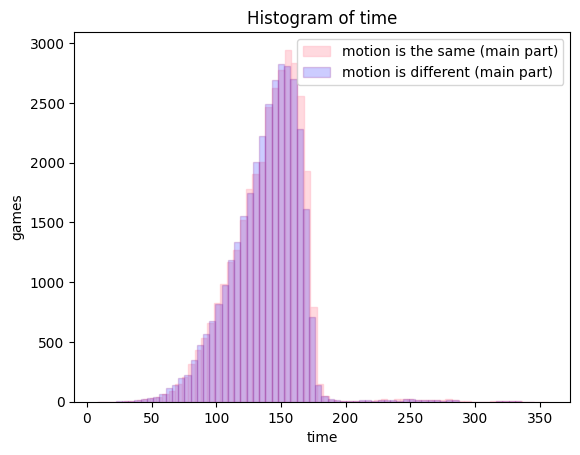

In [ ]:
y1 = mean_times_coin_main
y2 = mean_times_another_main
plt.hist(y1, color='pink', bins=70, alpha = 0.6, edgecolor = 'pink', label = 'motion is the same (main part)')
plt.hist(y2, color='blue', bins=70, alpha = 0.2, edgecolor = 'purple', label = 'motion is different (main part)')
plt.title('Histogram of time')
plt.xlabel('time')
plt.ylabel('games')
plt.legend()
plt.show()

Посмотрим на заключительную часть

In [ ]:
def coincidences_time_final(row):
  real = row['Moves_clean']
  pred = row['sf_n1_d22']
  times = row['Moves_time']
  idx = row['parts_idxs']

  coincidences_time = []
  another_time = []

  for i in range(idx[1], idx[2]):

    motion = real[i]
    if motion[0]['_1'] == pred[i][0]['_1']:
      coincidences_time.append(times[i])
    else:
      another_time.append(times[i])

  return [coincidences_time, another_time]

In [ ]:
times_final = chess_sample_df.apply(coincidences_time_final, axis=1)

In [ ]:
mean_times_coin_final = []
mean_times_another_final = []
for item in times_final:
  coincidences_times_final, another_times_final = np.array(item[0]), np.array(item[1])
  mean_times_coin_final.append(average_time_in_seconds(coincidences_times_final))
  mean_times_another_final.append(average_time_in_seconds(another_times_final))


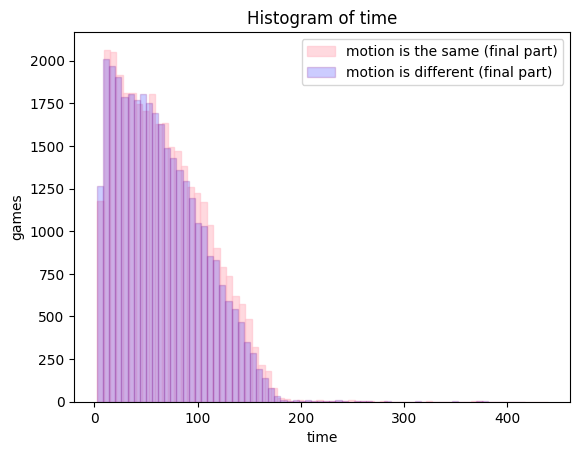

In [ ]:
y1 = mean_times_coin_final
y2 = mean_times_another_final
plt.hist(y1, color='pink', bins=70, alpha = 0.6, edgecolor = 'pink', label = 'motion is the same (final part)')
plt.hist(y2, color='blue', bins=70, alpha = 0.2, edgecolor = 'purple', label = 'motion is different (final part)')
plt.title('Histogram of time')
plt.xlabel('time')
plt.ylabel('games')
plt.legend()
plt.show()

Посмотрим на долю совпадений по частям - main и final

In [ ]:
def coincidences_main(row):
  real = row['Moves_clean']
  pred = row['sf_n1_d22']
  idxs = row['parts_idxs']

  coincidences_black = 0
  coincidences_white = 0

  for i in range(idxs[0], idxs[1]):
    motion = real[i]
    if motion[0]['_1'] == pred[i][0]['_1']:
      if i%2 == 0:
        coincidences_white += 1
      else:
        coincidences_black += 1
  return coincidences_white*2 / max(2, (idxs[1] - idxs[0]) + 1), coincidences_black *2 / max((idxs[1] - idxs[0]) + 1, 2)

In [ ]:
def coincidences_final(row):
  real = row['Moves_clean']
  pred = row['sf_n1_d22']
  idxs = row['parts_idxs']

  coincidences_black = 0
  coincidences_white = 0

  for i in range(idxs[1], idxs[2]):
    motion = real[i]
    if motion[0]['_1'] == pred[i][0]['_1']:
      if i%2 == 0:
        coincidences_white += 1
      else:
        coincidences_black += 1
  return coincidences_white*2 / max(2, (idxs[2] - idxs[1]) + 1), coincidences_black *2 / max(2, (idxs[2] - idxs[1]) + 1)

In [ ]:
chess_sample_df['coincidences_frac_w_main'] = round(chess_sample_df.apply(lambda x : coincidences_main(x)[0], axis=1), 2)
chess_sample_df['coincidences_frac_b_main'] = round(chess_sample_df.apply(lambda x : coincidences_main(x)[1], axis=1), 2)

chess_sample_df['coincidences_frac_w_final'] = round(chess_sample_df.apply(lambda x : coincidences_final(x)[0], axis=1), 2)
chess_sample_df['coincidences_frac_b_final'] = round(chess_sample_df.apply(lambda x : coincidences_final(x)[1], axis=1), 2)

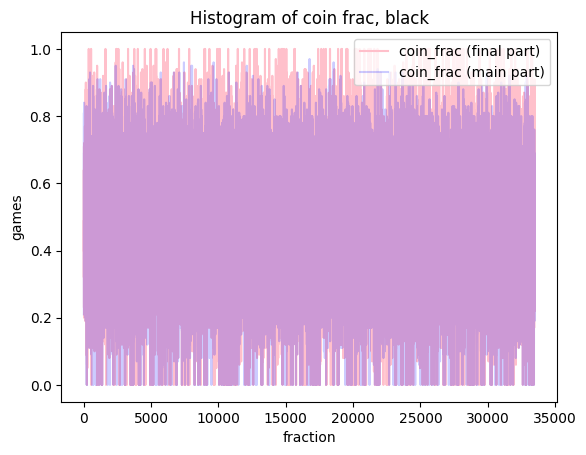

In [ ]:
y1 = chess_sample_df['coincidences_frac_b_final']
y2 = chess_sample_df['coincidences_frac_b_main']
x = range(len(y1))
plt.plot(x, y1, color='pink', label = 'coin_frac (final part)')
plt.plot(x, y2, color='blue', alpha = 0.2, label = 'coin_frac (main part)')
plt.title('Histogram of coin frac, black')
plt.xlabel('fraction')
plt.ylabel('games')
plt.legend()
plt.show()

Посмотрим на то же самое для titled - tuesday

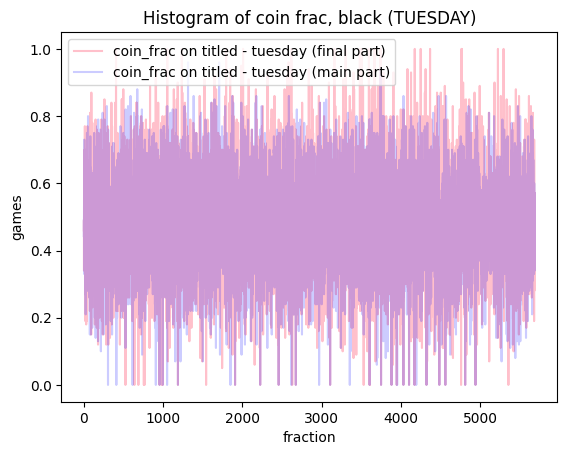

In [ ]:
y1 = chess_sample_df['coincidences_frac_b_final'][chess_sample_df['Tournament'] == 'titled-tuesday']
y2 = chess_sample_df['coincidences_frac_b_main'][chess_sample_df['Tournament'] == 'titled-tuesday']
x = range(len(y1))
plt.plot(x, y1, color='pink', label = 'coin_frac on titled - tuesday (final part)')
plt.plot(x, y2, color='blue', alpha = 0.2, label = 'coin_frac on titled - tuesday (main part)')
plt.title('Histogram of coin frac, black (TUESDAY)')
plt.xlabel('fraction')
plt.ylabel('games')
plt.legend()
plt.show()

И наоборот, вне турнира

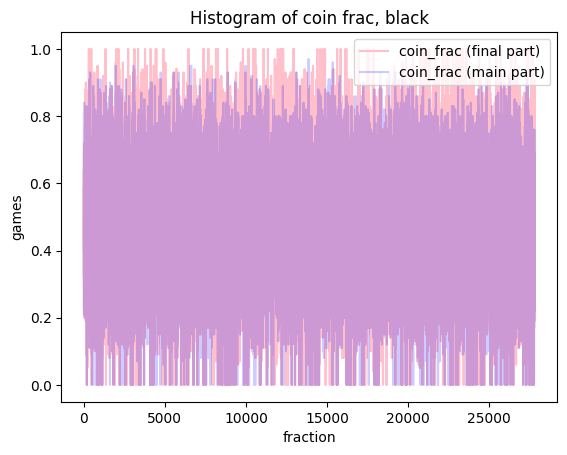

In [ ]:
y1 = chess_sample_df['coincidences_frac_b_final'][chess_sample_df['Tournament'] != 'titled-tuesday']
y2 = chess_sample_df['coincidences_frac_b_main'][chess_sample_df['Tournament'] != 'titled-tuesday']
x = range(len(y1))
plt.plot(x, y1, color='pink', label = 'coin_frac (final part)')
plt.plot(x, y2, color='blue', alpha = 0.2, label = 'coin_frac (main part)')
plt.title('Histogram of coin frac, black')
plt.xlabel('fraction')
plt.ylabel('games')
plt.legend()
plt.show()

ELO к доле совпадений

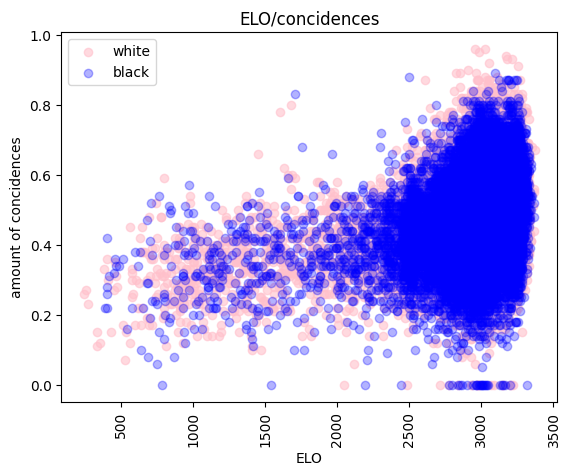

In [ ]:
x = chess_sample_df['WhiteElo'].astype(int)
y = chess_sample_df['coincidences_frac_w']

x2 = chess_sample_df['BlackElo'].astype(int)
y2 = chess_sample_df['coincidences_frac_b']

plt.scatter(x, y, color='pink', alpha = 0.6, label = 'white')
plt.scatter(x2, y2, color='blue', alpha = 0.3,  label = 'black')
plt.title('ELO/concidences')
plt.xticks(rotation=90)
plt.xlabel('ELO')
plt.ylabel('amount of concidences')
plt.legend()
plt.show()

Построим доверительные интервалы для количества совпадений по ELO

Игроки и доли совпадений

In [ ]:
def analisys_for_player_coin(username, df):
    filtered_df_w = df[df['White'] == username].sort_values(by=['Date'])
    filtered_df_b = df[df['Black'] == username].sort_values(by=['Date'])
    fractions = pd.concat([filtered_df_w['coincidences_frac_w'], filtered_df_b['coincidences_frac_b']])
    return fractions


In [ ]:
def analisys_for_player_elo(username, df):
    filter_w = df[df['White'] == username]
    filter_b = df[df['Black'] == username]
    elo = pd.concat([filter_w['WhiteElo'].astype('int64'), filter_b['BlackElo'].astype('int64')])
    return elo


In [ ]:
players_df = pd.concat([chess_sample_df['White'], chess_sample_df['Black']])
players_df = players_df.drop_duplicates()
players_names = list(players_df)

In [ ]:
from statistics import mean

In [ ]:
fractions = []
for name in players_names:
  fractions.append(list(analisys_for_player_coin(name, chess_sample_df)))

In [ ]:


elo = []
for name in players_names:
  elo.append(mean(list(analisys_for_player_elo(name, chess_sample_df))))

In [ ]:
print(len(fractions), len(elo), len(players_names))

3425 3425 3425


In [ ]:
player_df = pd.DataFrame({'username' : players_names, 'elo' : elo, 'frac' : fractions})

In [ ]:
player_df.head()

,username,elo,frac
0,Hikaru,3198.038602,0.500632
1,Bigfish1995,3054.559295,0.491050
2,Grischuk,3045.188845,0.516556
3,wonderfultime,2978.521739,0.451925
4,GHANDEEVAM2003,2973.323417,0.492322


In [ ]:
bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = np.concatenate(bin_data['frac'].to_numpy())
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2



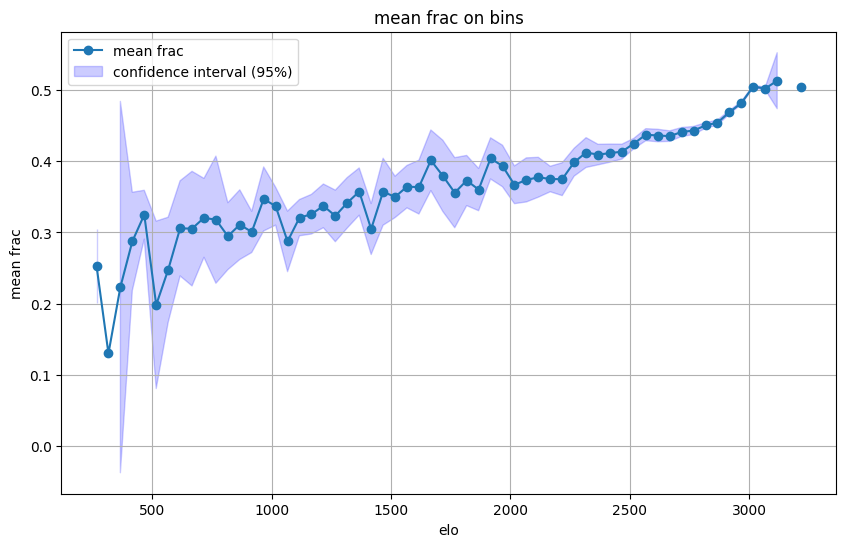

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean frac')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha=0.2, label='confidence interval (95%)')
plt.title('mean frac on bins')
plt.xlabel('elo')
plt.ylabel('mean frac')
plt.legend()
plt.grid()
plt.show()

Теперь

Alexander_Moskalenko
Nadeev_Sergey
DanielNaroditsky


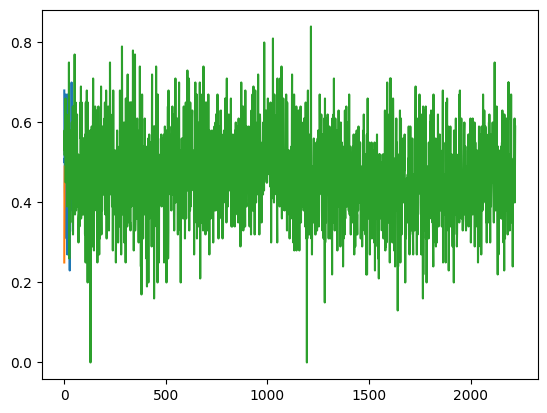

In [ ]:
for player in players_df[5:8]:
  print(player)
  fractions = analisys_for_player(player, chess_sample_df)
  plt.plot(list(range(len(fractions))), fractions)

plt.show()
